In [1]:
import time
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import os
from bs4 import BeautifulSoup
import requests
import csv
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from basketball_reference_web_scraper import client
from datetime import date
from functools import reduce
from datetime import datetime
from collections import Counter
from dateutil.rrule import rrule, DAILY
from basketball_reference_web_scraper import client
from basketball_reference_web_scraper.data import Team
from basketball_reference_web_scraper.data import Outcome
from basketball_reference_web_scraper.data import Position

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

all_data = pd.read_csv("output/full_dataframe.csv").set_index("Player")
all_data_2000 = pd.read_csv("output/full_df_leaderdata.csv").set_index("Player")

X=all_data[all_data['got_votes_mvp']==1]
X_18 = X[X["Year"]==2014]
y_18=X_18["Share_mvp"]
X_18=X_18[['PTS','TRB','AST','TS%','VORP','WS','W/L%','seed']]
X=X[X['Year']!=2019] #remove year that you are predicting
y=X["is_mvp"]
y2=X["Share_mvp"]
X=X[['PTS','TRB','AST','TS%','VORP','WS','W/L%','seed']]
reg = LinearRegression().fit(X, y)
print ("R^2 of linear regression (binary outcome): ",reg.score(X, y))
print ("linear regression coefficients:",reg.coef_)
linear_share=LinearRegression().fit(X,y2)
print ("R^2 of linear regression (vote share as outcome): ",linear_share.score(X,y2))

#LOGISTIC REGRESSION:

clf = LogisticRegression(C=1e5,random_state=0,solver='lbfgs').fit(X, y)
#X


R^2 of linear regression (binary outcome):  0.23340894294630443
linear regression coefficients: [ 0.00640572  0.00105905  0.00668832 -0.41789089  0.01695669  0.01466492
  0.5854273   0.0015431 ]
R^2 of linear regression (vote share as outcome):  0.5458826946195755


In [10]:
#2019 results
#Linear regression prediction of Share
final_df=all_data[all_data['Year']>=1988]

final_df_y = final_df[['PTS', 'TRB', 'AST', 'TS%', 'VORP', 'WS', 'W/L%', 'seed','Year','is_mvp']]
final_df = final_df[['PTS', 'TRB', 'AST', 'TS%', 'VORP', 'WS', 'W/L%', 'seed']]

binary_linear_predictions = reg.predict(final_df).tolist()
continuous_linear_predictions = linear_share.predict(final_df).tolist()

#Logistic Regression Prediction of MVP (binary)
logistic_probs = clf.predict_proba(final_df)[:,1]
print("Logistic Accuracy Score (Mean accuracy on test data)",clf.score(X, y))
print ("R^2 of linear regression (binary outcome): ",reg.score(X, y))
print ("R^2 of linear regression (continuous/vote share): ",linear_share.score(X,y2))
outcome_df = final_df_y
outcome_df['Logistic Prediction']=(clf.predict(final_df))
outcome_df['Logistic Probability (%)']=logistic_probs.astype('float')
#outcome_df['Linear Prediction-Binary Outcome'] = binary_linear_predictions
#outcome_df['Linear Prediction-Continuous Outcome (Vote Share)'] = continuous_linear_predictions
outcome_df["Logistic Probability (%)"]=outcome_df["Logistic Probability (%)"].astype(str)
outcome_df["Logistic Probability (%)"]=outcome_df["Logistic Probability (%)"].astype(float)
outcome_df=outcome_df.round(3)
outcome_df=outcome_df.sort_values('Logistic Probability (%)',ascending=False)
outcome_df[:60]

Logistic Accuracy Score (Mean accuracy on test data) 0.95625
R^2 of linear regression (binary outcome):  0.23340894294630443
R^2 of linear regression (continuous/vote share):  0.5458826946195755


,PTS,TRB,AST,TS%,VORP,WS,W/L%,seed,Year,is_mvp,Logistic Prediction,Logistic Probability (%)
Player,,,,,,,,,,,,
LeBron James,28.4,7.6,7.2,0.591,11.600,20.300,0.805,1,2009,1,1,0.975
Michael Jordan,30.4,6.6,4.3,0.582,8.200,20.154,0.878,1,1996,1,1,0.962
Shaquille O'Neal,29.7,13.6,3.8,0.578,8.972,17.944,0.817,1,2000,1,1,0.960
LeBron James,29.7,7.3,8.6,0.604,10.900,18.500,0.744,1,2010,1,1,0.957
Stephen Curry,30.1,5.4,6.7,0.669,9.800,17.900,0.890,1,2016,1,1,0.918
LeBron James,26.8,8.0,7.3,0.640,9.800,19.300,0.805,1,2013,1,1,0.915
Michael Jordan,30.1,6.4,6.1,0.579,8.102,17.279,0.817,1,1992,1,1,0.910
Michael Jordan,31.5,6.0,5.5,0.605,9.800,20.300,0.744,1,1991,1,1,0.905
James Harden,30.4,5.4,8.8,0.619,8.300,15.400,0.793,1,2018,1,1,0.889


In [43]:
X_18

,PTS,TRB,AST,TS%,VORP,WS,W/L%,seed
Player,,,,,,,,
Kevin Durant,32.0,7.4,5.5,0.635,8.5,19.2,0.720,2
LeBron James,27.1,6.9,6.3,0.649,8.0,15.9,0.659,2
Blake Griffin,24.1,9.5,3.9,0.583,4.8,12.2,0.695,3
Joakim Noah,12.6,11.3,5.4,0.531,6.1,11.2,0.585,4
James Harden,25.4,4.7,6.1,0.618,5.4,12.8,0.659,5
Stephen Curry,24.0,4.3,8.5,0.610,6.7,13.4,0.622,6
Chris Paul,19.1,4.3,10.7,0.580,5.2,12.2,0.695,3
Al Jefferson,21.8,10.8,2.1,0.532,2.5,7.8,0.524,7
Paul George,21.7,6.8,3.5,0.555,4.9,10.8,0.683,1


In [11]:
#Linear regression prediction of Share
binary_linear_predictions = reg.predict(X_18).tolist()
continuous_linear_predictions = linear_share.predict(X_18).tolist()

#Logistic Regression Prediction of MVP (binary)
logistic_probs = clf.predict_proba(X_18)[:,1]
print("Logistic Accuracy Score (Mean accuracy on test data)",clf.score(X, y))
print ("R^2 of linear regression (binary outcome): ",reg.score(X, y))
print ("R^2 of linear regression (continuous/vote share): ",linear_share.score(X,y2))
outcome18_df = X_18[['PTS', 'TRB', 'AST', 'TS%', 'VORP', 'WS', 'W/L%', 'seed']]
outcome18_df['Logistic Prediction']=(clf.predict(X_18))
outcome18_df['Logistic Probability (%)']=logistic_probs.astype('float')
outcome18_df['Linear Prediction-Binary Outcome'] = binary_linear_predictions
outcome18_df['Linear Pred Cont. Outcome (Share)'] = continuous_linear_predictions
outcome18_df["Logistic Probability (%)"]=outcome18_df["Logistic Probability (%)"].astype(str)
outcome18_df["Logistic Probability (%)"]=outcome18_df["Logistic Probability (%)"].astype(float)
outcome18_df=outcome18_df.round(3)
outcome18_df=outcome18_df.sort_values('Logistic Probability (%)',ascending=False)
outcome18_df

Logistic Accuracy Score (Mean accuracy on test data) 0.95625
R^2 of linear regression (binary outcome):  0.23340894294630443
R^2 of linear regression (continuous/vote share):  0.5458826946195755


,PTS,TRB,AST,TS%,VORP,WS,W/L%,seed,Logistic Prediction,Logistic Probability (%),Linear Prediction-Binary Outcome,Linear Pred Cont. Outcome (Share)
Player,,,,,,,,,,,,
Kevin Durant,32.0,7.4,5.5,0.635,8.398,18.969,0.720,2,1,0.655,0.319,0.608
LeBron James,27.1,6.9,6.3,0.649,7.904,15.708,0.659,2,0,0.081,0.195,0.422
Chris Paul,19.1,4.3,10.7,0.580,5.137,12.053,0.695,3,0,0.017,0.121,0.216
Paul George,21.7,6.8,3.5,0.555,4.841,10.670,0.683,1,0,0.008,0.067,0.198
Blake Griffin,24.1,9.5,3.9,0.583,4.742,12.053,0.695,3,0,0.007,0.105,0.245
Tim Duncan,15.1,9.7,3.0,0.535,2.766,7.311,0.756,1,0,0.002,-0.009,0.027
James Harden,25.4,4.7,6.1,0.618,5.335,12.646,0.659,5,0,0.001,0.109,0.195
Stephen Curry,24.0,4.3,8.5,0.610,6.619,13.239,0.622,6,0,0.001,0.130,0.219
LaMarcus Aldridge,23.2,11.1,2.6,0.507,1.482,7.410,0.659,4,0,0.001,-0.019,0.061


In [13]:
outcome18_df.join(y_18).sort_values("Share_mvp",ascending=False)

,PTS,TRB,AST,TS%,VORP,WS,W/L%,seed,Logistic Prediction,Logistic Probability (%),Linear Prediction-Binary Outcome,Linear Pred Cont. Outcome (Share),Share_mvp
Player,,,,,,,,,,,,,
Kevin Durant,32.0,7.4,5.5,0.635,8.398,18.969,0.720,2,1,0.655,0.319,0.608,0.986
LeBron James,27.1,6.9,6.3,0.649,7.904,15.708,0.659,2,0,0.081,0.195,0.422,0.713
Blake Griffin,24.1,9.5,3.9,0.583,4.742,12.053,0.695,3,0,0.007,0.105,0.245,0.347
Joakim Noah,12.6,11.3,5.4,0.531,6.027,11.065,0.585,4,0,0.000,0.010,0.108,0.258
James Harden,25.4,4.7,6.1,0.618,5.335,12.646,0.659,5,0,0.001,0.109,0.195,0.068
Stephen Curry,24.0,4.3,8.5,0.610,6.619,13.239,0.622,6,0,0.001,0.130,0.219,0.053
Chris Paul,19.1,4.3,10.7,0.580,5.137,12.053,0.695,3,0,0.017,0.121,0.216,0.036
Al Jefferson,21.8,10.8,2.1,0.532,2.470,7.706,0.524,7,0,0.000,-0.095,-0.050,0.027
Paul George,21.7,6.8,3.5,0.555,4.841,10.670,0.683,1,0,0.008,0.067,0.198,0.026


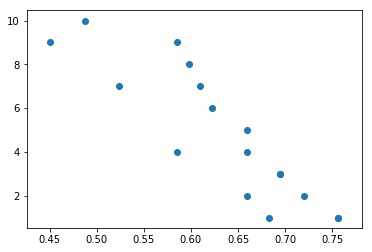

In [14]:
#2005 - no one deserved it according to model
#2011 Lebron deserved more than DRose but he was a close second so no biggie
#2006 - Lebron deserved it with data but it wasn't super clear - Nash def had something up his sleave
#2014
import matplotlib.pyplot as plt

plt.scatter(outcome18_df['W/L%'],outcome18_df['seed'])
plt.show()

In [17]:
#____THIS IS TO TEST A SPECIFIC YEAR___

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import svm

def logislinearMVP(anno):
    X=all_data[all_data['got_votes_mvp']==1]
    X_18 = X[X["Year"]==anno]
    y_18=X_18[["Share_mvp","is_mvp"]]
    X_18=X_18[['PTS','TRB','AST','TS%','VORP','WS','W/L%','seed']]
    X=X[X['Year']!=anno] #remove year that we're predicting
    y=X["is_mvp"]
    y2=X["Share_mvp"]
    X=X[['PTS','TRB','AST','TS%','VORP','WS','W/L%','seed']]
    reg = LinearRegression().fit(X, y)
    linear_share=LinearRegression().fit(X,y2)
    #print ("linear regression coefficients:",reg.coef_)

    #LOGISTIC REGRESSION:
    clf = LogisticRegression(C=1e5,random_state=0,solver='lbfgs').fit(X, y)
    
    #SVM
    clf_svm = svm.SVR().fit(X,y)

    #outputs:
    
    binary_linear_predictions = reg.predict(X_18).tolist()  #Linear regression prediction of Share
    continuous_linear_predictions = linear_share.predict(X_18).tolist()
    logistic_probs = clf.predict_proba(X_18)[:,1]  #Logistic Regression Prediction of MVP (binary)
    
    #print("Logistic Accuracy Score (Mean accuracy on test data)",clf.score(X, y))
    #print ("R^2 of linear regression (binary outcome): ",reg.score(X, y))
    #print ("R^2 of linear regression (continuous/vote share): ",linear_share.score(X,y2))
   
    outcome18_df = X_18[['PTS', 'TRB', 'AST', 'TS%', 'VORP', 'WS', 'W/L%', 'seed']]
    outcome18_df['Logistic Prediction']=(clf.predict(X_18))
    outcome18_df['SVM Prediction']=(clf_svm.predict(X_18))
    outcome18_df['Logistic Probability (%)']=logistic_probs.astype('float')
    outcome18_df['Linear Prediction-Binary Outcome'] = binary_linear_predictions
    outcome18_df['Linear Pred Cont. Outcome (Share)'] = continuous_linear_predictions
    outcome18_df["Logistic Probability (%)"]=outcome18_df["Logistic Probability (%)"].astype(str)
    outcome18_df["Logistic Probability (%)"]=outcome18_df["Logistic Probability (%)"].astype(float)
    outcome18_df=outcome18_df.round(3)
    outcome18_df=outcome18_df.sort_values('Logistic Probability (%)',ascending=False)
    final_output = outcome18_df.join(y_18).sort_values('SVM Prediction',ascending=False)
    final_output = final_output[['PTS', 'TRB', 'AST', 'TS%', 'VORP', 'WS', 'W/L%', 'seed',
           'Logistic Prediction', 'is_mvp','Logistic Probability (%)', 'Share_mvp','SVM Prediction',
           'Linear Prediction-Binary Outcome', 'Linear Pred Cont. Outcome (Share)']]
    return final_output

#for anno in range (1989,2019):
#    logislinearMVP(anno)

logislinearMVP(2015)

,PTS,TRB,AST,TS%,VORP,WS,W/L%,seed,Logistic Prediction,is_mvp,Logistic Probability (%),Share_mvp,SVM Prediction,Linear Prediction-Binary Outcome,Linear Pred Cont. Outcome (Share)
Player,,,,,,,,,,,,,,,
Stephen Curry,23.8,4.3,7.7,0.638,7.805,15.511,0.817,1,0,1,0.296,0.922,0.222,0.260,0.409
Russell Westbrook,28.1,7.3,8.6,0.536,7.508,10.472,0.549,8,0,0,0.000,0.271,0.144,0.124,0.229
Anthony Davis,24.4,10.2,2.2,0.591,5.631,13.831,0.549,9,0,0,0.000,0.156,0.129,0.057,0.135
Klay Thompson,21.7,3.2,2.9,0.591,2.865,8.694,0.817,1,0,0,0.002,0.001,0.116,0.050,0.057
Kawhi Leonard,16.5,7.2,2.5,0.567,4.051,8.496,0.671,4,0,0,0.000,0.001,0.114,-0.031,-0.037
Marc Gasol,17.4,7.8,3.8,0.558,4.545,10.077,0.671,5,0,0,0.000,0.002,0.110,0.023,0.038
LaMarcus Aldridge,23.4,10.2,1.7,0.528,1.383,8.496,0.622,6,0,0,0.000,0.005,0.107,-0.033,0.014
Blake Griffin,21.9,7.6,5.3,0.551,3.557,8.892,0.683,2,0,0,0.006,0.002,0.105,0.038,0.141
Tim Duncan,13.9,9.1,3.0,0.560,4.149,9.484,0.671,4,0,0,0.000,0.001,0.094,-0.021,-0.009


MVP in 1988 Predicted incorrectly as Larry Bird . The correct MVP was  Michael Jordan
MVP in 1989 Predicted correctly
MVP in 1990 Predicted correctly


/Users/crazyforcandy1234/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



MVP in 1991 Predicted correctly
MVP in 1992 Predicted correctly
MVP in 1993 Predicted incorrectly as Michael Jordan . The correct MVP was  Charles Barkley
MVP in 1994 Predicted incorrectly as David Robinson . The correct MVP was  Hakeem Olajuwon
MVP in 1995 Predicted correctly
MVP in 1996 Predicted correctly
MVP in 1997 Predicted incorrectly as Michael Jordan . The correct MVP was  Karl Malone
MVP in 1998 Predicted incorrectly as Karl Malone . The correct MVP was  Michael Jordan
MVP in 1999 Predicted correctly
MVP in 2000 Predicted correctly
MVP in 2001 Predicted incorrectly as Shaquille O'Neal . The correct MVP was  Allen Iverson
MVP in 2002 Predicted correctly
MVP in 2003 Predicted correctly
MVP in 2004 Predicted correctly
MVP in 2005 Predicted incorrectly as Dwyane Wade . The correct MVP was  Steve Nash
MVP in 2006 Predicted incorrectly as LeBron James . The correct MVP was  Steve Nash
MVP in 2007 Predicted correctly
MVP in 2008 Predicted incorrectly as Chris Paul . The correct MVP 

/Users/crazyforcandy1234/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



MVP in 2009 Predicted correctly
MVP in 2010 Predicted correctly
MVP in 2011 Predicted incorrectly as LeBron James . The correct MVP was  Derrick Rose
MVP in 2012 Predicted correctly
MVP in 2013 Predicted correctly
MVP in 2014 Predicted correctly
MVP in 2015 Predicted correctly
MVP in 2016 Predicted correctly
MVP in 2017 Predicted incorrectly as James Harden . The correct MVP was  Russell Westbrook
MVP in 2018 Predicted correctly


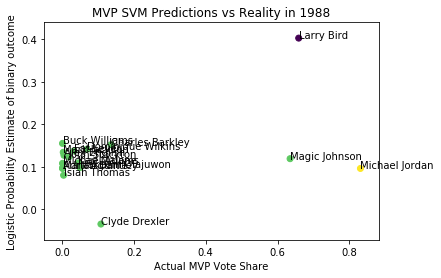

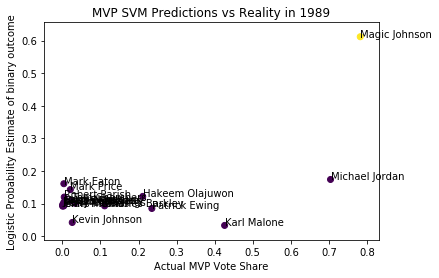

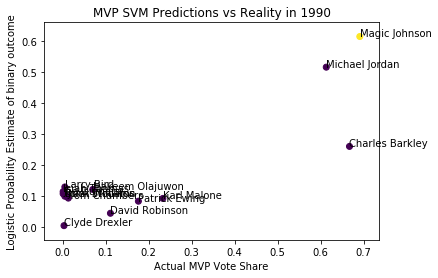

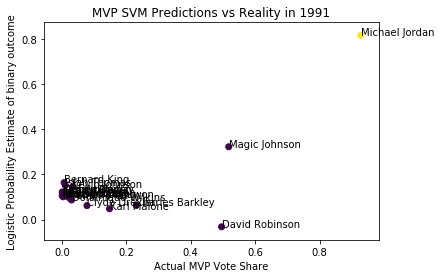

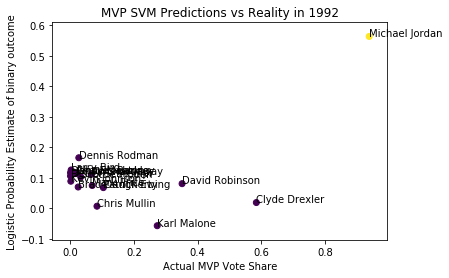

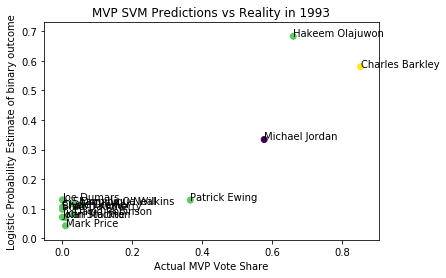

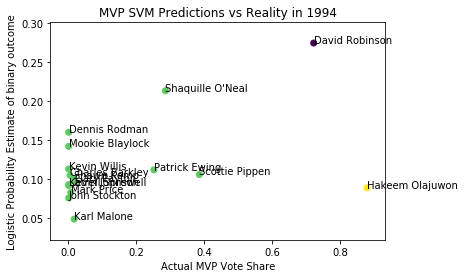

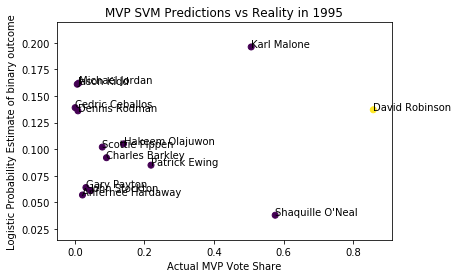

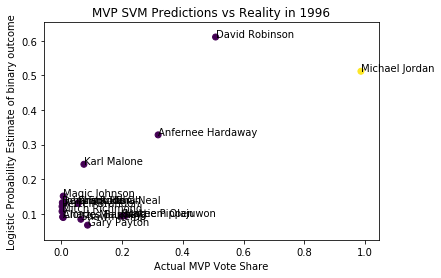

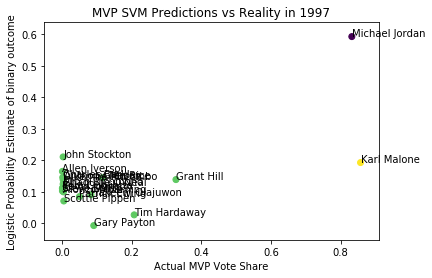

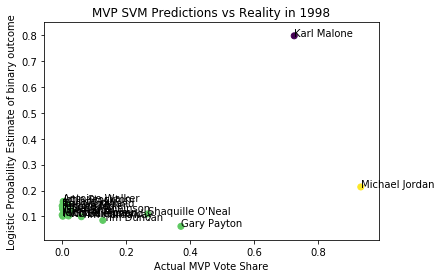

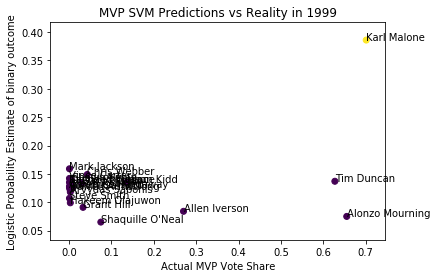

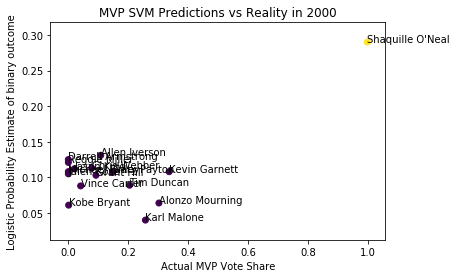

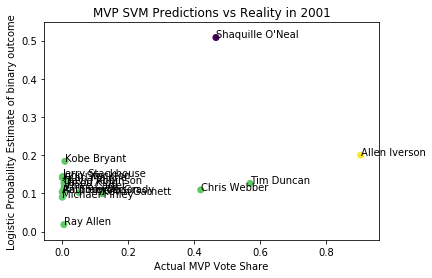

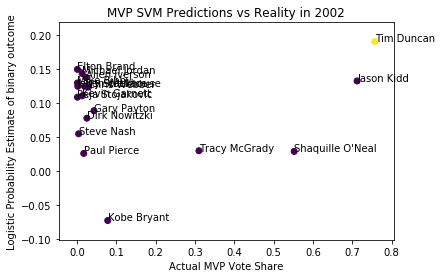

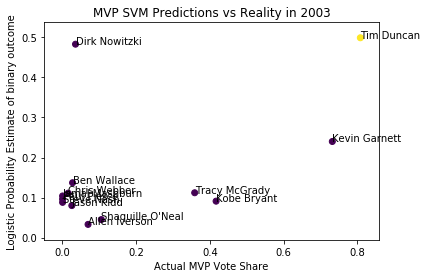

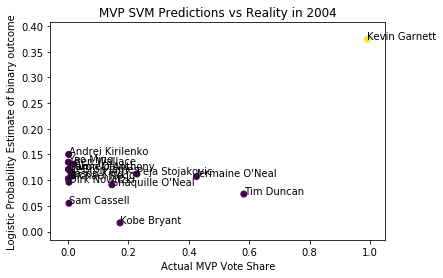

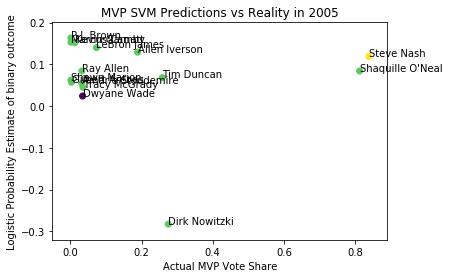

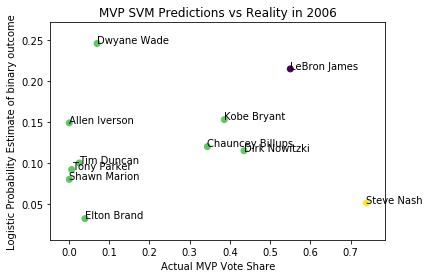

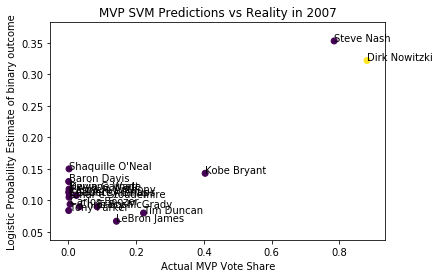

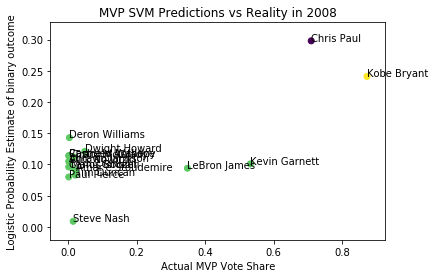

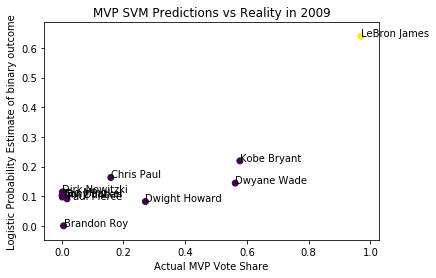

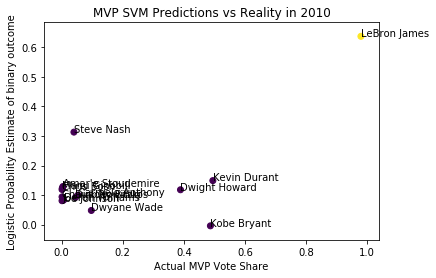

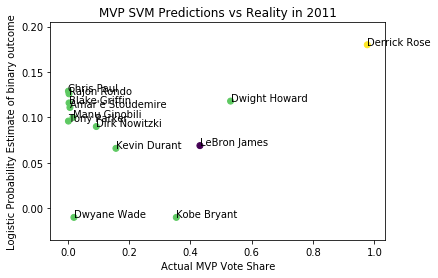

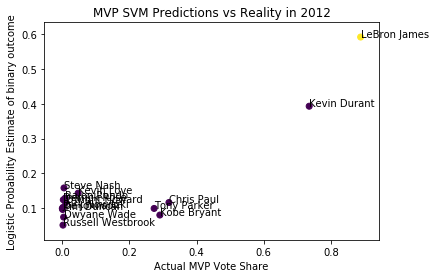

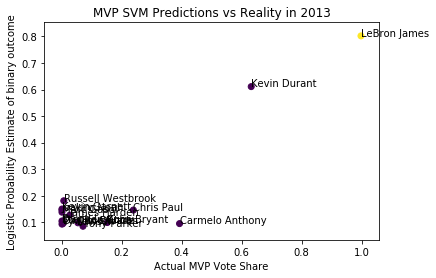

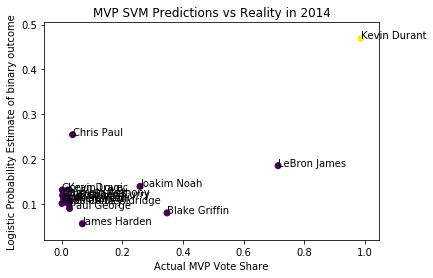

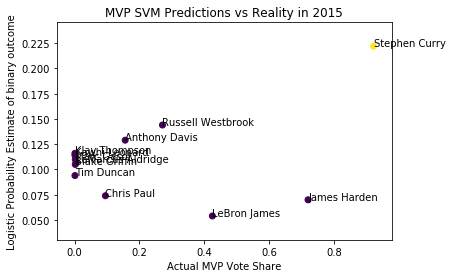

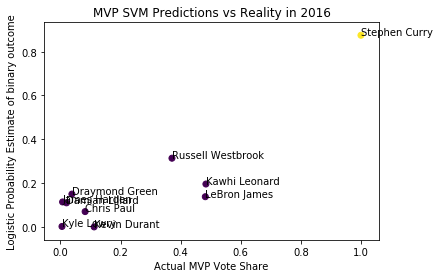

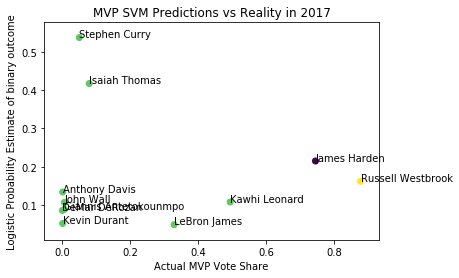

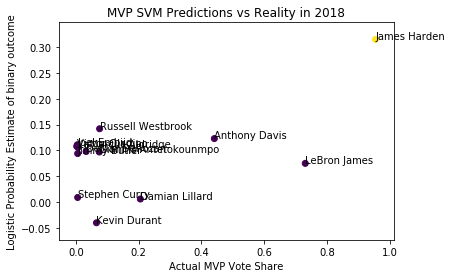

In [19]:
import matplotlib
from matplotlib.lines import Line2D

def plot_prediction(year):
    df=logislinearMVP(year)
    fig, ax = plt.subplots()
    if df.loc[df['Logistic Probability (%)'].idxmax()]['is_mvp']==1:
        print ("MVP in",year,"Predicted correctly")
        color=df['is_mvp']
        
    else:
        print ("MVP in",year,"Predicted incorrectly as",df['Logistic Probability (%)'].idxmax(),
              ". The correct MVP was ",df['is_mvp'].idxmax())
        df['color']=df['is_mvp']
        df['color'][df['Logistic Probability (%)'].idxmax()]=-3
        color=df['color']
    df.loc[df['Logistic Probability (%)'].idxmax()]
    ax.scatter(df['Share_mvp'],df['SVM Prediction'],c=color,label=color)
    #ax.legend(['MVP','Predicted MVP'],loc='upper left')
    
    #legend_elements = [Line2D([0], [0], marker='o',color='w', label='MVP',
                            # markerfacecolor='purple',markersize=8),
                   #Line2D([0], [0], marker='o', color='w', label='Predicted MVP',
                          #markerfacecolor='y',markersize=8)]
    #ax.legend(handles=legend_elements, loc='upper_left')


    for i, txt in enumerate(df.index):
        ax.annotate(txt, (df['Share_mvp'][i],df['SVM Prediction'][i]))
    
    plt.xlabel("Actual MVP Vote Share")
    plt.ylabel("Logistic Probability Estimate of binary outcome")
    plt.title("MVP SVM Predictions vs Reality in "+ str(year))

for i in range (1988,2019):
    #print ("Year:",i,logislinearMVP(i)[["Logistic Prediction","is_mvp"]])
    plot_prediction(i)

In [21]:
#interpretation, observations
#bad years for prediction: 2017, 2008, 2006, 2005, 2001, 1999 kinda, 1998 could be better 1997 could be  better
#1994 could be better 1993 same, 1988 bad
#2005 and 1999 are messed up because they need adjustment for lockout

logislinearMVP(2019)

ValueError: Found array with 0 sample(s) (shape=(0, 8)) while a minimum of 1 is required.